<a href="https://colab.research.google.com/github/talisilvestre/Pos_Aula/blob/main/TechChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essa analise tem como objetivo trazer dados sobre a exportação de vinho do Brasil. É uma analise que servirá como tech challenge da pós graduação de data Analitycs da FIAP.

Hoje apresentaremos dados das exportações de vinhos e o comportamento durante os anos, desde 1997




In [71]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [72]:
#lendo o arquivo
dados = pd.read_csv("/content/ExpVinho.csv",encoding="utf-8-sig", sep=";",thousands=".", decimal=",")

In [73]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 108.1+ KB


In [75]:
print(dados.columns)

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1',
       '2022', '2022.1'],
      dtype='object', length=108)


In [76]:
dados.describe()

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,64.500000,1062.570312,316.406250,2197.695312,652.070312,2976.718750,946.070312,3681.796875,1365.562500,2788.945312,...,3.012627e+04,5.848487e+04,2.463182e+04,4.636583e+04,3.445091e+04,4.748662e+04,6.295862e+04,7.696830e+04,5.489049e+04,8.551002e+04
std,37.094474,8164.733371,2242.559282,21104.386629,5718.388164,26139.497969,7640.049948,30003.295024,10396.968066,22110.531883,...,2.859996e+05,4.874595e+05,2.146607e+05,3.435221e+05,2.943276e+05,3.487028e+05,5.789220e+05,6.395490e+05,4.539559e+05,6.414746e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,64.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+00,8.500000e+00,2.650000e+01,1.350000e+01,4.700000e+01,3.500000e+01,2.110000e+02
75%,96.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.316000e+03,9.207750e+03,7.497500e+02,2.572500e+03,1.117500e+03,4.706000e+03,1.860750e+03,7.287500e+03,1.954500e+03,7.688250e+03
max,128.000000,89846.000000,23980.000000,237805.000000,64075.000000,291625.000000,84402.000000,332433.000000,115041.000000,243294.000000,...,3.234168e+06,5.494321e+06,2.419537e+06,3.826587e+06,3.299013e+06,3.869243e+06,6.522527e+06,7.192362e+06,5.076670e+06,7.156293e+06


In [77]:
#verificando se não existe nenhum dado duplicado
dados.duplicated().sum()

0

In [78]:
dados.isnull().sum()

Id        0
País      0
1970      0
1970.1    0
1971      0
         ..
2020.1    0
2021      0
2021.1    0
2022      0
2022.1    0
Length: 108, dtype: int64

In [79]:
#renomear variaveis
quantidade = ['País','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_quantidade = dados[quantidade].copy()
df_quantidade

,País,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,11,0
1,África do Sul,0,0,0,0,0,0,0,0,0,26,4,0,0
2,"Alemanha, República Democrática",27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,Angola,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,0,2,0,0
124,Uruguai,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117
125,Vanuatu,0,0,0,0,0,0,0,0,0,0,18,0,0
126,Venezuela,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220


In [80]:
dados2 = df_quantidade.set_index("País")
dados2.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,26,4,0,0
"Alemanha, República Democrática",27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
Angola,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
dados2["Total"] = dados2.sum(axis=1)
dados2.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,11,0,11
África do Sul,0,0,0,0,0,0,0,0,0,26,4,0,0,30
"Alemanha, República Democrática",27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,418223
Angola,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,88361
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
dados_ordenados = dados2.sort_values("Total", ascending=False)
dados_ordenados.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,
Paraguai,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,26535942
Rússia,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,10909227
Estados Unidos,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,2747141
Espanha,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,1987877
Haiti,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,1787083


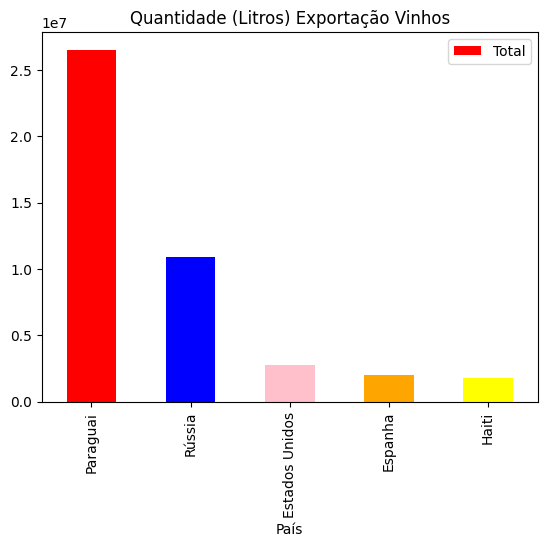

In [83]:
cores = ['red', 'blue', 'pink', 'orange', 'yellow']
grafico1 = dados_ordenados.head(5).plot( y='Total', kind='bar', color=cores, title='Quantidade (Litros) Exportação Vinhos')
plt.show()

In [84]:
dados_mensal = dados_ordenados.drop(columns=["Total"])
dados_mensal

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Paraguai,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670
Rússia,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046
Estados Unidos,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373
Espanha,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0
Haiti,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,0,0,0
El Salvador,0,0,0,0,0,0,0,0,0,0,0,0,0


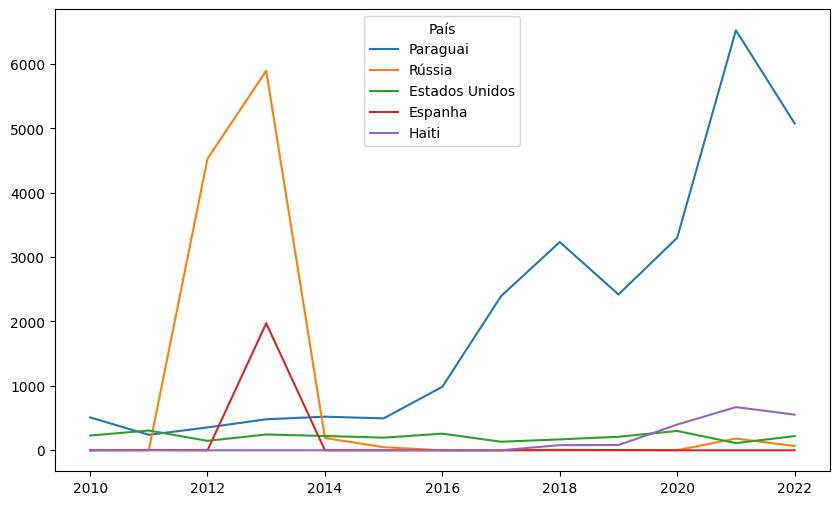

In [85]:
dados_ordenados2 = dados_mensal /1000
axis = dados_ordenados2.head(5).T.plot(figsize=(10,6))

É possível observar um pico de exportação de vinho para a Russia entre 2010 a 2014, porém, quando olhamos para o Paraguai vemos uma tendencia de crescimento ao longo dos anos.
A Russia ainda está como 2 colocada de exportação, dado o pico gerado entre esses anos.

In [ ]:
#ordenar os 10 paises que mais tem exportação de vinho
#plotar os meses
#plotar o crescimento dos últimos 2 anos
#tentar encontrar correlação com dados climaticos/demográficos

In [86]:
valores = ['País','2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1']
df_valores = dados[valores].copy()
df_valores

,País,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,46,0
1,África do Sul,0,0,0,0,0,0,0,0,0,95,21,0,0
2,"Alemanha, República Democrática",138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
3,Angola,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,0,4,0,0
124,Uruguai,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,997367
125,Vanuatu,0,0,0,0,0,0,0,0,0,0,31,0,0
126,Venezuela,0,0,7492,0,232,0,0,2646,355,0,9808,35944,32351


In [87]:
dados_valores2 = df_valores.set_index("País")
dados_valores2.head()

,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
dados_valores2["Total"] = dados_valores2.sum(axis=1)
dados_valores2.head()

,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total
País,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,46,0,46
África do Sul,0,0,0,0,0,0,0,0,0,95,21,0,0,116
"Alemanha, República Democrática",138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,1722942
Angola,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,420871
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
dados_ordenados_vl = dados_valores2.sort_values("Total", ascending=False)
dados_ordenados_vl.head()

,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total
País,,,,,,,,,,,,,,
Paraguai,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,36952856
Rússia,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,17419436
Estados Unidos,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,8219894
Reino Unido,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,4487600
China,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,4238199


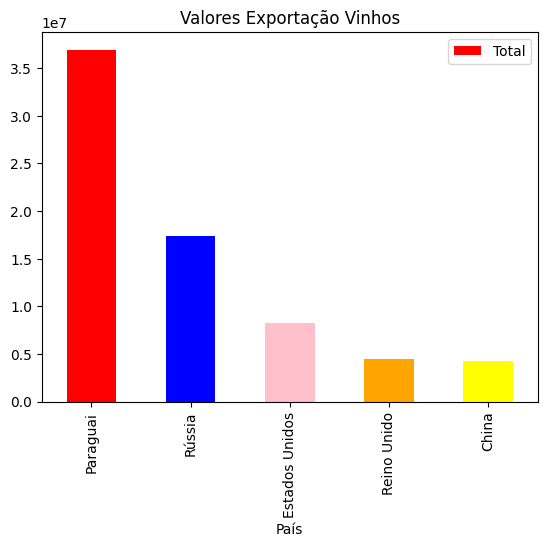

In [90]:
cores = ['red', 'blue', 'pink', 'orange', 'yellow']
grafico_vl = dados_ordenados_vl.head(5).plot( y='Total', kind='bar', color=cores, title='Valores Exportação Vinhos')
plt.show()

In [91]:
dados_mensal_vl = dados_ordenados_vl.drop(columns=["Total"])
dados_mensal_vl

,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,
Paraguai,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293
Rússia,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618
Estados Unidos,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893
Reino Unido,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154
China,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,0,0,0
Costa Rica,0,0,0,0,0,0,0,0,0,0,0,0,0
"Eslovaca, Republica",0,0,0,0,0,0,0,0,0,0,0,0,0


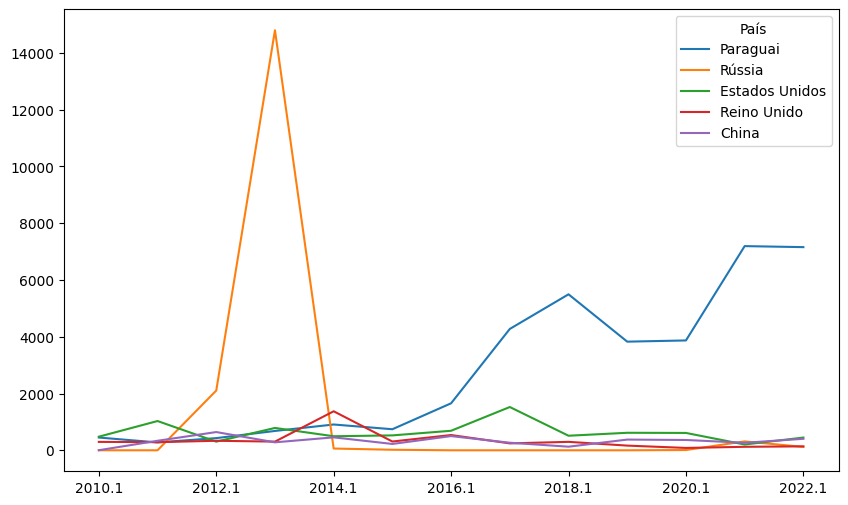

In [92]:
dados_ordenados2_vl = dados_mensal_vl /1000
axis = dados_ordenados2_vl.head(5).T.plot(figsize=(10,6))

In [93]:
base_vl_qtd = pd.merge(dados_ordenados, dados_ordenados_vl, on='País')
base_vl_qtd

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total_y
País,,,,,,,,,,,,,,,,,,,,,
Paraguai,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,...,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,36952856
Rússia,0,0,4528176,5893291,190656,47664,0,0,0,0,...,61440,18240,0,0,0,0,8550,312926,118618,17419436
Estados Unidos,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,...,494216,524109,687411,1523699,512519,616274,610793,203554,447893,8219894
Espanha,0,5206,0,1972980,0,0,0,0,6123,3540,...,0,0,0,0,22631,1353,126,0,0,3797668
Haiti,2700,0,0,0,0,0,0,0,79500,81873,...,0,0,0,0,144425,129803,471152,831181,741014,2321325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porto Rico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Salvador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
colunas_usaveis = ['Total_x', 'Total_y']
base_totais = base_vl_qtd[colunas_usaveis].copy()
base_totais

,Total_x,Total_y
País,,
Paraguai,26535942,36952856
Rússia,10909227,17419436
Estados Unidos,2747141,8219894
Espanha,1987877,3797668
Haiti,1787083,2321325
...,...,...
Porto Rico,0,0
Costa do Marfim,0,0
El Salvador,0,0


In [97]:
base_totais["PPL"] = base_totais['Total_x']/base_totais['Total_y']
base_totais.head()

,Total_x,Total_y,PPL
País,,,
Paraguai,26535942,36952856,0.718103
Rússia,10909227,17419436,0.626268
Estados Unidos,2747141,8219894,0.334206
Espanha,1987877,3797668,0.523447
Haiti,1787083,2321325,0.769855


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Total_x'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Total_y'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['PPL'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Total_x'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Total_y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['PPL'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Total_x', 'Total_y'], ['Total_y', 'PPL']]], **{})
chart

In [100]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(6 * figscale, 3 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['PPL'], **{})
chart

O Paraguai além de ser o maior país que temos como cliente, também é o segundo que melhor paga o preço de dolar por litro, enquanto o EUA o que tende a gerar mais lucro/investimento para a exportação do vinho

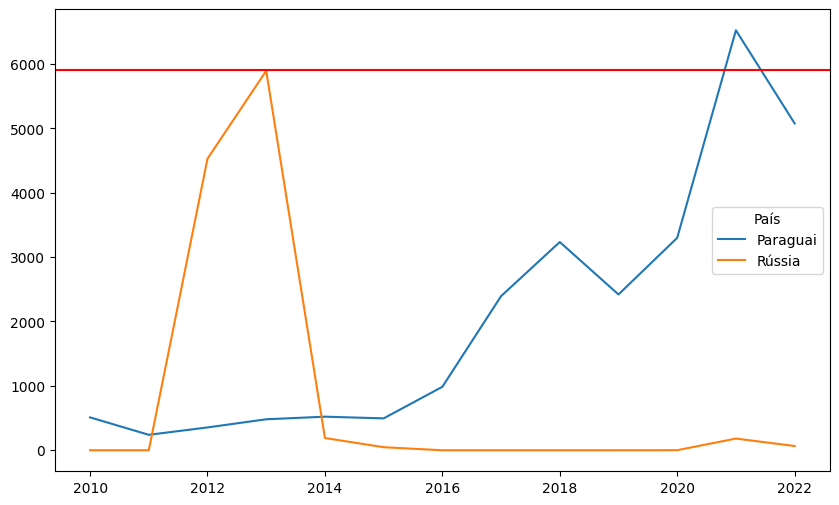

In [111]:
axis = dados_ordenados2.head(2).T.plot(figsize=(10,6))
plt.axhline(y = 5900, color = 'r', linestyle = '-')
plt.show()

Apesar do grande pico que a russia teve em 2023 de importação do vinho brasileiro, o paraguaí já o ultrapassou em 2021, ou seja, ele é nosso principal consumidor.